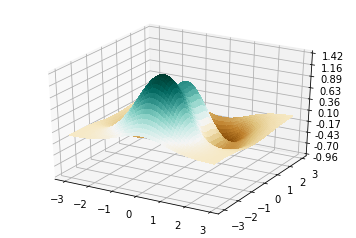

LinAlgError: Singular matrix

In [147]:
import sympy as sy
import numpy as np
import math
from math import e
def func(x,y):
    return (1-(x**2+y**3))*(e**(-(x**2+y**2)/2))


from sympy import *

x=Symbol('x')
y=Symbol('y')

der_x=diff(func(x,y),x).doit()

der_y=diff(func(x,y),y).doit()

d_derv_xx=diff(der_x,x).doit()
d_derv_xy=diff(der_y,x).doit()
d_derv_yx=diff(der_x,y).doit()
d_derv_yy=diff(der_y,y).doit()


def derv_x(x,y):
    return -1.0*2.71828182845905**(-x**2/2 - y**2/2)*x*(-x**2 - y**3 + 1) - 2*2.71828182845905**(-x**2/2 - y**2/2)*x
def derv_y(x,y):
    return -3*2.71828182845905**(-x**2/2 - y**2/2)*y**2 - 1.0*2.71828182845905**(-x**2/2 - y**2/2)*y*(-x**2 - y**3 + 1)

def d_derv_xx(x,y):
    return 6.0*2.71828182845905**(-x**2/2 - y**2/2)*y**3 + 1.0*2.71828182845905**(-x**2/2 - y**2/2)*y**2*(-x**2 - y**3 + 1) - 6*2.71828182845905**(-x**2/2 - y**2/2)*y - 1.0*2.71828182845905**(-x**2/2 - y**2/2)*(-x**2 - y**3 + 1) 

def d_derv_xy(x,y):
    return 3.0*2.71828182845905**(-x**2/2 - y**2/2)*x*y**2 + 1.0*2.71828182845905**(-x**2/2 - y**2/2)*x*y*(-x**2 - y**3 + 1) + 2.0*2.71828182845905**(-x**2/2 - y**2/2)*x*y

def d_derv_yx(x,y):
    return 3.0*2.71828182845905**(-x**2/2 - y**2/2)*x*y**2 + 1.0*2.71828182845905**(-x**2/2 - y**2/2)*x*y*(-x**2 - y**3 + 1) + 2.0*2.71828182845905**(-x**2/2 - y**2/2)*x*y 

def d_derv_yy(x,y):
    return 6.0*2.71828182845905**(-x**2/2 - y**2/2)*y**3 + 1.0*2.71828182845905**(-x**2/2 - y**2/2)*y**2*(-x**2 - y**3 + 1) - 6*2.71828182845905**(-x**2/2 - y**2/2)*y - 1.0*2.71828182845905**(-x**2/2 - y**2/2)*(-x**2 - y**3 + 1)



func=np.vectorize(func)

X=np.arange(-3,3,0.1)
Y=np.arange(-3,3,0.1)

from pylab import imshow,meshgrid
X,Y=meshgrid(X,Y)


import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,func(X,Y),rstride=1,cstride=1,cmap=cm.BrBG,color='red',linewidth=0,antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()



vector=[-3,-3]
alpha=0.001

while(True):
    der_vector=np.array([derv_x(vector[0],vector[1]),derv_y(vector[0],vector[1])])
    hessian=np.array([[d_derv_xx(vector[0],vector[1]),d_derv_xy(vector[0],vector[1])],[d_derv_yx(vector[0],vector[1]),d_derv_yy(vector[0],vector[1])]])
    
    # calculate inverse of hessian

    inv=np.linalg.inv(hessian)
    vector=vector+(alpha*der_vector*inv)
    
    if der_vector.all()==0 and hessian.all()<0:
        break
        
print(vector)
      





0.1353352832366127